### Plotting Benchmarks

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

METRICS_PATH = '/usr/local/google/home/tanjihui/Desktop/ipra-dev/metrics'
df = pd.read_csv(f'{METRICS_PATH}/performance_metrics.csv')
ipra_df = pd.read_csv(f'{METRICS_PATH}/ipra_performance_metrics.csv')
ipra_df['Compiler'] = ipra_df['Compiler'].astype(str)
df = pd.concat([df, ipra_df], ignore_index=True)
# Filter to get only the rows with individual runs (1, 2, 3, etc.)
df_runs = df[pd.to_numeric(df['Run'], errors='coerce').notnull()].copy()
df_runs['Run'] = df_runs['Run'].astype(int)

# ==============================================================================
# CORRECTIVE STEP: As you instructed, we create the 'TotalCPUTime_s' column
# by combining 'UserTime_s' and 'SysTime_s'. This is now done directly on the
# 'df_runs' DataFrame to ensure it exists for all subsequent operations.
df_runs['TotalCPUTime_s'] = df_runs['UserTime_s'] + df_runs['SysTime_s']
# ==============================================================================

# Create the "warm runs" DataFrame (excluding run 1) from the corrected df_runs
warm_runs_df = df_runs[df_runs['Run'] > 1].copy()

# Set a consistent plot style for all graphs
plt.style.use('seaborn-v0_8-whitegrid')

In [14]:
warm_runs_df

,Compiler,Run,RealTime_s,UserTime_s,SysTime_s,TotalCPUTime_s
3,bootstrapped_clang,2,212.47,10840.00,594.04,11434.04
4,fdo_clang,2,157.60,7731.58,538.26,8269.84
5,thinly_linked_fdo_clang,2,130.38,6614.62,534.70,7149.32
6,bootstrapped_clang,3,210.58,10802.87,589.78,11392.65
7,fdo_clang,3,158.23,7800.28,546.44,8346.72
8,thinly_linked_fdo_clang,3,131.32,6665.29,536.72,7202.01
9,bootstrapped_clang,4,211.33,10871.37,594.43,11465.80
10,fdo_clang,4,157.27,7742.31,543.01,8285.32
11,thinly_linked_fdo_clang,4,129.87,6565.95,531.48,7097.43
12,bootstrapped_clang,5,211.33,10826.67,591.18,11417.85


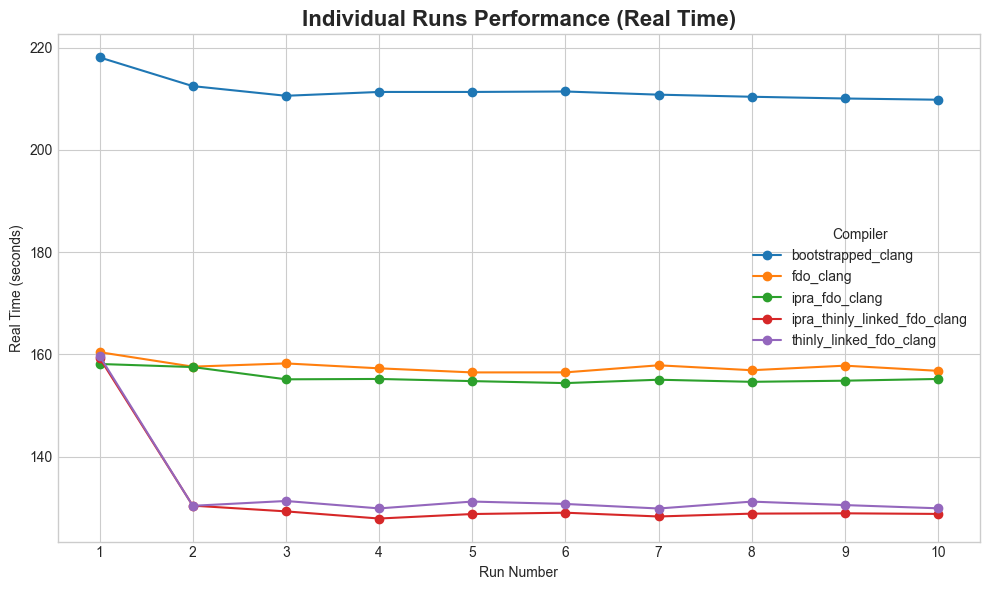

In [9]:
# --- 2. Generate Plots for Real Time ---

# 2a. Individual Runs - Real Time
pivot_real = df_runs.pivot(index='Run', columns='Compiler', values='RealTime_s')
fig, ax = plt.subplots(figsize=(10, 6))
pivot_real.plot(kind='line', marker='o', ax=ax)
ax.set_title('Individual Runs Performance (Real Time)', fontsize=16, fontweight='bold')
ax.set_ylabel('Real Time (seconds)')
ax.set_xlabel('Run Number')
ax.legend(title='Compiler')
ax.set_xticks(df_runs['Run'].unique())
plt.tight_layout()
plt.show()

/tmp/ipykernel_3184612/919862672.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_real.index, rotation=0)


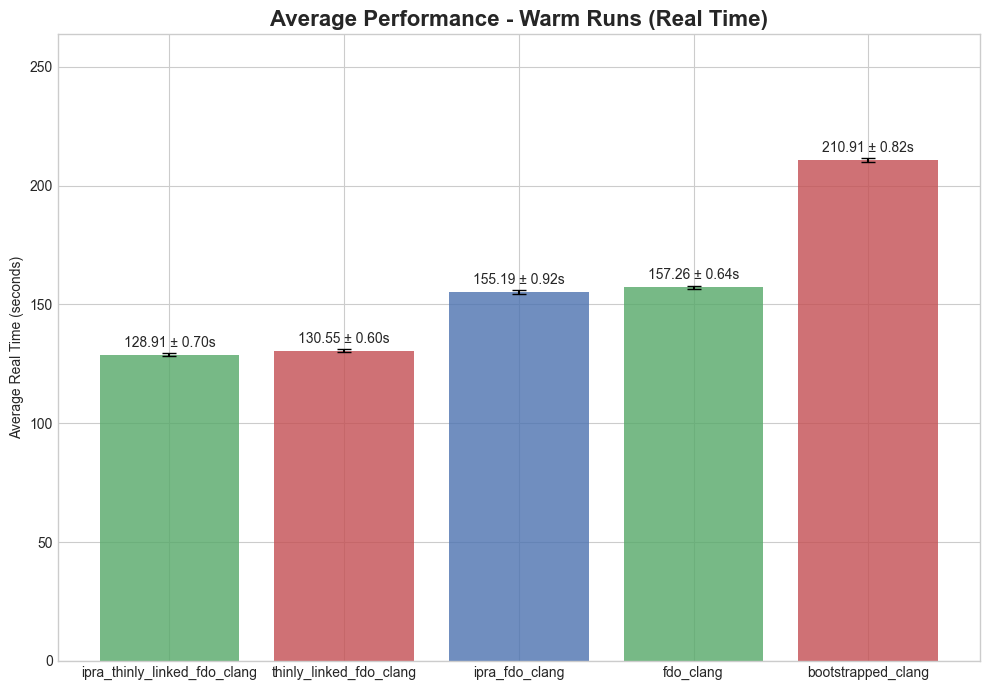

In [10]:
# 2b. Average Performance (Warm Runs) - Real Time
avg_real = warm_runs_df.groupby('Compiler')['RealTime_s'].mean().sort_values()
std_real = warm_runs_df.groupby('Compiler')['RealTime_s'].std().reindex(avg_real.index)
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(avg_real.index, avg_real, yerr=std_real, capsize=5,
              color=['#55a868', '#c44e52', '#4c72b0'], alpha=0.8)
ax.set_title('Average Performance - Warm Runs (Real Time)', fontsize=16, fontweight='bold')
ax.set_ylabel('Average Real Time (seconds)')
ax.set_xticklabels(avg_real.index, rotation=0)
ax.set_ylim(0, avg_real.max() * 1.25)
for i, bar in enumerate(bars):
    yval = bar.get_height()
    avg_val = avg_real.iloc[i]
    std_val = std_real.iloc[i]
    label = f'{avg_val:.2f} ± {std_val:.2f}s'
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 2, label, ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

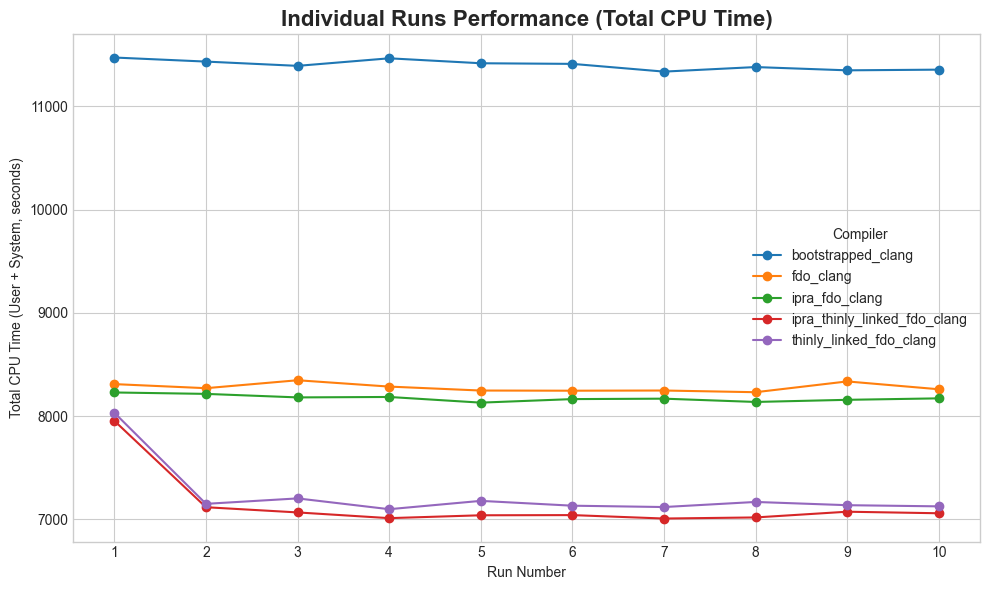

In [11]:
# --- 3. Generate Plots for Total CPU Time ---
# 3a. Individual Runs - Total CPU Time
pivot_cpu = df_runs.pivot(index='Run', columns='Compiler', values='TotalCPUTime_s')
fig, ax = plt.subplots(figsize=(10, 6))
pivot_cpu.plot(kind='line', marker='o', ax=ax)
ax.set_title('Individual Runs Performance (Total CPU Time)', fontsize=16, fontweight='bold')
ax.set_ylabel('Total CPU Time (User + System, seconds)')
ax.set_xlabel('Run Number')
ax.legend(title='Compiler')
ax.set_xticks(df_runs['Run'].unique())
plt.tight_layout()
plt.show()


/tmp/ipykernel_3184612/3212994367.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_cpu.index, rotation=0)


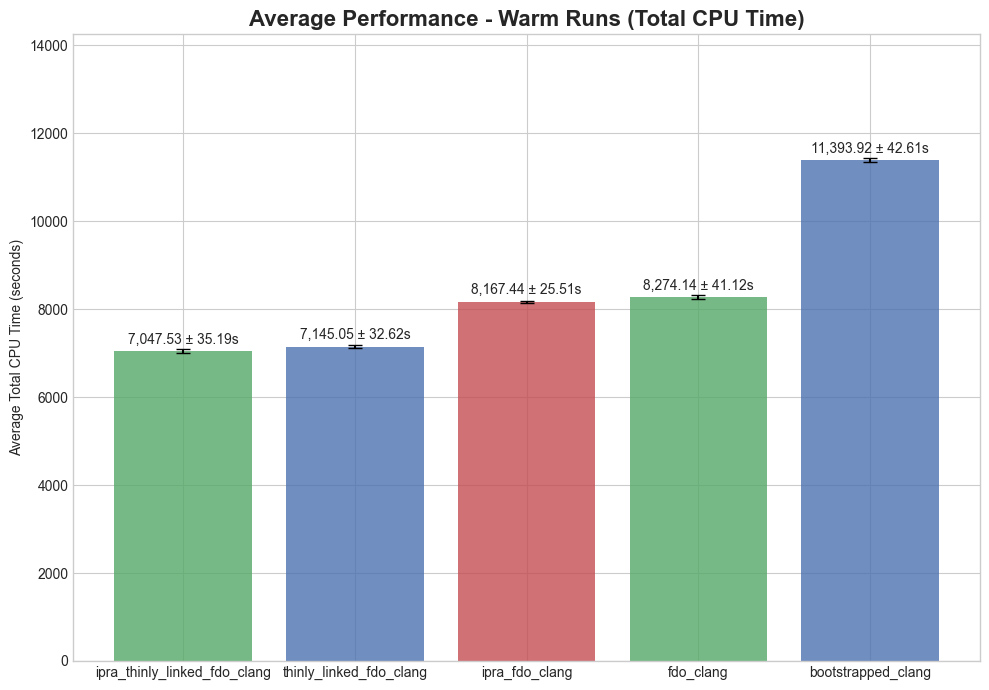

In [12]:
# 3b. Average Performance (Warm Runs) - Total CPU Time
avg_cpu = warm_runs_df.groupby('Compiler')['TotalCPUTime_s'].mean().sort_values()
std_cpu = warm_runs_df.groupby('Compiler')['TotalCPUTime_s'].std().reindex(avg_cpu.index)
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(avg_cpu.index, avg_cpu, yerr=std_cpu, capsize=5,
              color=['#55a868', '#4c72b0', '#c44e52'], alpha=0.8)
ax.set_title('Average Performance - Warm Runs (Total CPU Time)', fontsize=16, fontweight='bold')
ax.set_ylabel('Average Total CPU Time (seconds)')
ax.set_xticklabels(avg_cpu.index, rotation=0)
ax.set_ylim(0, avg_cpu.max() * 1.25)
for i, bar in enumerate(bars):
    yval = bar.get_height()
    avg_val = avg_cpu.iloc[i]
    std_val = std_cpu.iloc[i]
    label = f'{avg_val:,.2f} ± {std_val:.2f}s'
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 100, label, ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

In [19]:
from scipy import stats

def perform_ttest(df, compiler1, compiler2, metric='RealTime_s', alpha=0.05):
    """
    Performs and interprets an independent two-sample t-test between two compilers.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the benchmark data.
        compiler1 (str): The name of the baseline compiler.
        compiler2 (str): The name of the experimental compiler.
        metric (str): The performance metric column to compare (e.g., 'RealTime_s').
        alpha (float): The significance level for the test.
    """
    # --- 1. Extract Data ---
    # Isolate the performance metric for each of the two compilers.
    data1 = df[df['Compiler'] == compiler1][metric]
    data2 = df[df['Compiler'] == compiler2][metric]
    
    print(f"--- T-test for {compiler1} vs. {compiler2} on {metric} ---")
    print(f"Average for {compiler1}: {data1.mean():.2f}s")
    print(f"Average for {compiler2}: {data2.mean():.2f}s")
    
    # --- 2. Perform Welch's T-test ---
    # We use Welch's t-test (equal_var=False) as it's more robust and
    # does not assume the two groups have equal variance.
    t_statistic, p_value = stats.ttest_ind(data1, data2, equal_var=False, nan_policy='omit')
    
    print(f"T-statistic: {t_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")
    
    # --- 3. Interpret the Results ---
    # The p-value tells us the probability of observing the data (or something
    # more extreme) if there were no real difference between the compilers.
    if p_value < alpha:
        print(f"Conclusion: The difference is statistically significant (p < {alpha}).")
        if data2.mean() < data1.mean():
            print(f"Result: '{compiler2}' shows a significant improvement (is faster) than '{compiler1}'.")
        else:
            print(f"Result: '{compiler2}' shows a significant regression (is slower) than '{compiler1}'.")
    else:
        print(f"Conclusion: The difference is not statistically significant (p >= {alpha}).")
        print("Result: We cannot conclude there is a meaningful performance difference between the two compilers.")
    print("-" * 60 + "\n")

In [20]:
# ==============================================================================
#                      Run the T-Tests on the "Warm Runs" Data
# ==============================================================================
# We use the 'warm_runs_df' to exclude the first run, which may be an outlier
# due to caching effects, providing a more stable comparison.

# --- Comparison 1: Standard FDO vs. IPRA-enabled FDO ---
perform_ttest(warm_runs_df, 'fdo_clang', 'ipra_fdo_clang', metric='RealTime_s')
perform_ttest(warm_runs_df, 'fdo_clang', 'ipra_fdo_clang', metric='TotalCPUTime_s')

--- T-test for fdo_clang vs. ipra_fdo_clang on RealTime_s ---
Average for fdo_clang: 157.26s
Average for ipra_fdo_clang: 155.19s
T-statistic: 5.570115664870754
P-value: 6.352541880388502e-05
Conclusion: The difference is statistically significant (p < 0.05).
Result: 'ipra_fdo_clang' shows a significant improvement (is faster) than 'fdo_clang'.
------------------------------------------------------------

--- T-test for fdo_clang vs. ipra_fdo_clang on TotalCPUTime_s ---
Average for fdo_clang: 8274.14s
Average for ipra_fdo_clang: 8167.44s
T-statistic: 6.614781432477079
P-value: 1.4630352312049718e-05
Conclusion: The difference is statistically significant (p < 0.05).
Result: 'ipra_fdo_clang' shows a significant improvement (is faster) than 'fdo_clang'.
------------------------------------------------------------



In [21]:
# --- Comparison 2: ThinLTO FDO vs. IPRA-enabled ThinLTO FDO ---
perform_ttest(warm_runs_df, 'thinly_linked_fdo_clang', 'ipra_thinly_linked_fdo_clang', metric='RealTime_s')
perform_ttest(warm_runs_df, 'thinly_linked_fdo_clang', 'ipra_thinly_linked_fdo_clang', metric='TotalCPUTime_s')

--- T-test for thinly_linked_fdo_clang vs. ipra_thinly_linked_fdo_clang on RealTime_s ---
Average for thinly_linked_fdo_clang: 130.55s
Average for ipra_thinly_linked_fdo_clang: 128.91s
T-statistic: 5.342379776076061
P-value: 7.07021577240186e-05
Conclusion: The difference is statistically significant (p < 0.05).
Result: 'ipra_thinly_linked_fdo_clang' shows a significant improvement (is faster) than 'thinly_linked_fdo_clang'.
------------------------------------------------------------

--- T-test for thinly_linked_fdo_clang vs. ipra_thinly_linked_fdo_clang on TotalCPUTime_s ---
Average for thinly_linked_fdo_clang: 7145.05s
Average for ipra_thinly_linked_fdo_clang: 7047.53s
T-statistic: 6.097302324958491
P-value: 1.580745852098611e-05
Conclusion: The difference is statistically significant (p < 0.05).
Result: 'ipra_thinly_linked_fdo_clang' shows a significant improvement (is faster) than 'thinly_linked_fdo_clang'.
------------------------------------------------------------

